# Load the Data

In [210]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [211]:
tcs = pd.read_csv("./TCS.csv")
tcs.shape

(4447, 7)

# Data Splitting

In [212]:
# Check the date range of the dataset
earliest_date = tcs['Date'].min()
latest_date = tcs['Date'].max()

earliest_date, latest_date


('2005-12-02', '2023-12-01')

In [213]:
# Calculate the number of rows for the split
total_rows = len(tcs)
split_point = int(total_rows * 0.7)

# Split the data into training and testing sets
train_data = tcs[:split_point]
test_data = tcs[split_point:]

# Display the number of rows in each set and the respective date ranges
train_rows = len(train_data)
test_rows = len(test_data)
train_date_range = (train_data['Date'].min(), train_data['Date'].max())
test_date_range = (test_data['Date'].min(), test_data['Date'].max())

train_rows, train_date_range, test_rows, test_date_range


(3112, ('2005-12-02', '2018-07-04'), 1335, ('2018-07-05', '2023-12-01'))

In [214]:
train_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2005-12-02,194.332504,196.800003,192.632507,193.750000,139.145081,4784360.0
1,2005-12-05,194.000000,194.262497,190.782501,191.419998,137.471786,1913080.0
2,2005-12-06,191.875000,196.250000,190.787506,194.250000,139.504196,3233064.0
3,2005-12-07,195.250000,200.000000,195.037506,199.445007,143.235077,5618952.0
4,2005-12-08,199.375000,203.087494,199.032501,202.070007,145.120239,9585192.0


# EDA (Exploratory data analysis)

In [175]:
train_data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,3105.000000,3105.000000,3105.000000,3105.000000,3105.000000,3.105000e+03
mean,725.912721,734.291746,717.146037,725.672073,599.328817,3.461626e+06
std,453.051101,456.940341,449.363857,453.124224,403.139225,3.070541e+06
min,112.000000,116.112503,103.837502,111.550003,83.785233,0.000000e+00
25%,286.250000,289.225006,281.000000,285.250000,208.736298,1.874468e+06
50%,601.500000,608.500000,592.375000,599.599976,471.557800,2.716008e+06
75%,1202.650024,1214.000000,1191.750000,1202.525024,1027.589966,4.163292e+06
max,1879.900024,1885.150024,1857.150024,1874.050049,1674.508301,8.806715e+07


In [176]:
train_data.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume       float64
dtype: object

In [177]:
# Convert 'Date' column to datetime type for both training and testing data
train_data['Date'] = pd.to_datetime(train_data['Date'])
test_data['Date'] = pd.to_datetime(test_data['Date'])

# Verify the conversion by checking the data types
train_data.dtypes, test_data.dtypes


<ipython-input-177-d8d3ab12b180>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['Date'] = pd.to_datetime(train_data['Date'])
<ipython-input-177-d8d3ab12b180>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Date'] = pd.to_datetime(test_data['Date'])


(Date         datetime64[ns]
 Open                float64
 High                float64
 Low                 float64
 Close               float64
 Adj Close           float64
 Volume              float64
 dtype: object,
 Date         datetime64[ns]
 Open                float64
 High                float64
 Low                 float64
 Close               float64
 Adj Close           float64
 Volume              float64
 dtype: object)

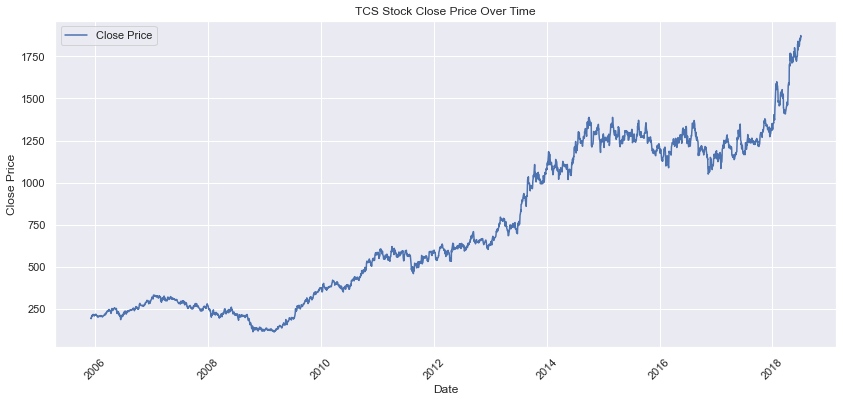

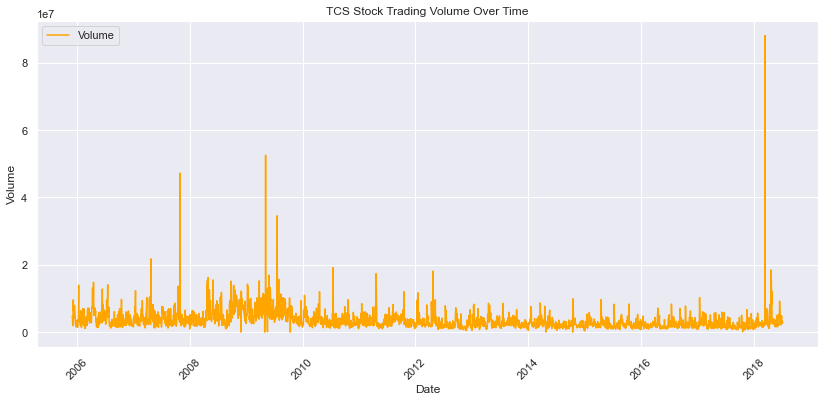

In [178]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the plot style
sns.set(style="darkgrid")

# Plotting 'Close' price over time
plt.figure(figsize=(14, 6))
plt.plot(train_data['Date'], train_data['Close'], label='Close Price')
plt.title('TCS Stock Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.xticks(rotation=45)
plt.legend()
plt.show()

# Plotting 'Volume' over time
plt.figure(figsize=(14, 6))
plt.plot(train_data['Date'], train_data['Volume'], label='Volume', color='orange')
plt.title('TCS Stock Trading Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.xticks(rotation=45)
plt.legend()
plt.show()


In [179]:
# Adjusting the moving averages to 30-day and 100-day
short_window = 30
long_window = 100

train_data['Short_MA'] = train_data['Close'].rolling(window=short_window, min_periods=1).mean()
train_data['Long_MA'] = train_data['Close'].rolling(window=long_window, min_periods=1).mean()



<ipython-input-179-94a2388581bd>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['Short_MA'] = train_data['Close'].rolling(window=short_window, min_periods=1).mean()
<ipython-input-179-94a2388581bd>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['Long_MA'] = train_data['Close'].rolling(window=long_window, min_periods=1).mean()


In [180]:
# Update the trading signals
train_data['Signal'] = 0
train_data.loc[short_window:, 'Signal'] = np.where(
    train_data['Short_MA'][short_window:] > train_data['Long_MA'][short_window:], 1, 0)
train_data['Position'] = train_data['Signal'].diff()

# Remove rows with NaN values (primarily at the beginning of the dataset)
train_data.dropna(inplace=True)

train_data.head()

<ipython-input-180-03d24c7c6acb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['Signal'] = 0
c:\users\garvs\appdata\local\programs\python\python38\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
<ipython-input-180-03d24c7c6acb>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.p

,Date,Open,High,Low,Close,Adj Close,Volume,Short_MA,Long_MA,Signal,Position
1,2005-12-05,194.000,194.262497,190.782501,191.419998,137.471786,1913080.0,192.584999,192.584999,0,0.0
2,2005-12-06,191.875,196.250000,190.787506,194.250000,139.504196,3233064.0,193.139999,193.139999,0,0.0
3,2005-12-07,195.250,200.000000,195.037506,199.445007,143.235077,5618952.0,194.716251,194.716251,0,0.0
4,2005-12-08,199.375,203.087494,199.032501,202.070007,145.120239,9585192.0,196.187002,196.187002,0,0.0
5,2005-12-09,202.250,211.824997,201.412506,210.337494,151.057678,6194224.0,198.545418,198.545418,0,0.0


In [181]:
initial_capital = 100000

In [182]:
# Backtesting the updated Moving Averages Strategy
# Resetting the portfolio for the moving averages strategy
ma_portfolio = pd.DataFrame(index=train_data.index)
ma_portfolio['Position'] = train_data['Signal'] * position
ma_portfolio['Cash'] = initial_capital - (ma_portfolio['Position'].diff() * train_data['Close']).cumsum()
ma_portfolio['Total'] = ma_portfolio['Cash'] + (train_data['Close'] * ma_portfolio['Position'])
ma_portfolio['Returns'] = ma_portfolio['Total'].pct_change()

# Sharpe Ratio and Maximum Drawdown for the updated moving averages strategy
ma_sharpe_ratio = ma_portfolio['Returns'].mean() / ma_portfolio['Returns'].std() * np.sqrt(252)
ma_roll_max = ma_portfolio['Total'].cummax()
ma_daily_drawdown = ma_portfolio['Total']/ma_roll_max - 1.0
ma_max_drawdown = ma_daily_drawdown.cummin().min()

# Implementing the Buy-and-Hold Strategy on the train data
bh_portfolio = pd.DataFrame(index=train_data.index)
bh_portfolio['Holdings'] = initial_capital / train_data['Close'].iloc[0] * train_data['Close']
bh_portfolio['Total'] = bh_portfolio['Holdings']
bh_portfolio['Returns'] = bh_portfolio['Total'].pct_change()

# Sharpe Ratio and Maximum Drawdown for the buy-and-hold strategy
bh_sharpe_ratio = bh_portfolio['Returns'].mean() / bh_portfolio['Returns'].std() * np.sqrt(252)
bh_roll_max = bh_portfolio['Total'].cummax()
bh_daily_drawdown = bh_portfolio['Total']/bh_roll_max - 1.0
bh_max_drawdown = bh_daily_drawdown.cummin().min()

# Results
ma_portfolio.tail(), ma_sharpe_ratio, ma_max_drawdown, bh_portfolio.tail(), bh_sharpe_ratio, bh_max_drawdown


(      Position        Cash        Total   Returns
 3107       100 -11331.7383  172938.2568 -0.008770
 3108       100 -11331.7383  173443.2617  0.002920
 3109       100 -11331.7383  173803.2593  0.002076
 3110       100 -11331.7383  176073.2666  0.013061
 3111       100 -11331.7383  175283.2641 -0.004487,
 0.4316761077732605,
 -0.3660147198593354,
            Holdings          Total   Returns
 3107  962647.565695  962647.565695 -0.008235
 3108  965285.769149  965285.769149  0.002741
 3109  967166.437856  967166.437856  0.001948
 3110  979025.216059  979025.216059  0.012261
 3111  974898.152491  974898.152491 -0.004215,
 0.7389535882483962,
 -0.6635880272372394)

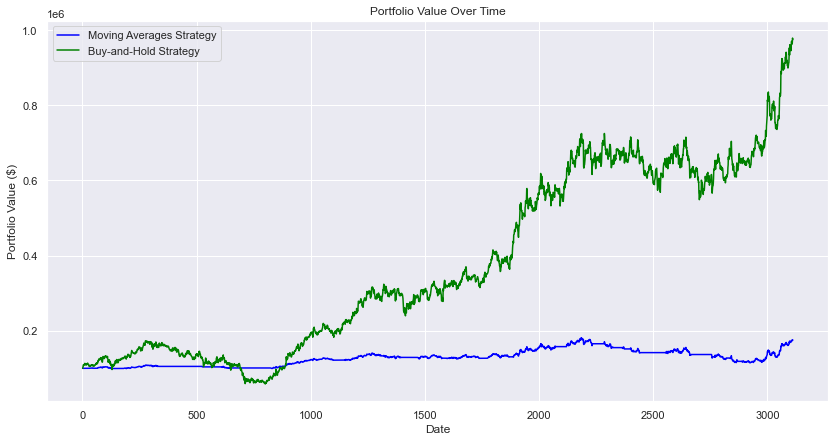

In [183]:
import matplotlib.pyplot as plt

# Plotting the portfolio values over time
plt.figure(figsize=(14, 7))

# Moving Averages Strategy
plt.plot(ma_portfolio['Total'], label='Moving Averages Strategy', color='blue')

# Buy-and-Hold Strategy
plt.plot(bh_portfolio['Total'], label='Buy-and-Hold Strategy', color='green')

plt.title('Portfolio Value Over Time')
plt.xlabel('Date')
plt.ylabel('Portfolio Value ($)')
plt.legend()
plt.show()


In [184]:
# Final wealth for both strategies
final_wealth_ma_strategy = ma_portfolio['Total'].iloc[-1]
final_wealth_bh_strategy = bh_portfolio['Total'].iloc[-1]

final_wealth_ma_strategy, final_wealth_bh_strategy


(175283.2641, 974898.1524908383)

# Machine learning models

In [185]:
# Reload the data as the previous session state was reset
file_path = './TCS.csv'
data = pd.read_csv(file_path)

# Convert 'Date' to datetime
data['Date'] = pd.to_datetime(data['Date'])



In [186]:
# Splitting the data into a 70-30 train-test split
split_point = int(len(data) * 0.7)
train_data = data[:split_point]
test_data = data[split_point:]

# Displaying the number of rows in each set and the respective date ranges
train_data_info = (len(train_data), train_data_ml['Date'].min(), train_data['Date'].max())
test_data_info = (len(test_data), test_data_ml['Date'].min(), test_data['Date'].max())

train_data_info, test_data_info


((3112, Timestamp('2005-12-02 00:00:00'), Timestamp('2018-07-04 00:00:00')),
 (1335, Timestamp('2018-07-05 00:00:00'), Timestamp('2023-12-01 00:00:00')))

In [187]:
# Descriptive statistics for the training data
train_data.describe()


,Open,High,Low,Close,Adj Close,Volume
count,3105.000000,3105.000000,3105.000000,3105.000000,3105.000000,3.105000e+03
mean,725.912721,734.291746,717.146037,725.672073,599.328817,3.461626e+06
std,453.051101,456.940341,449.363857,453.124224,403.139225,3.070541e+06
min,112.000000,116.112503,103.837502,111.550003,83.785233,0.000000e+00
25%,286.250000,289.225006,281.000000,285.250000,208.736298,1.874468e+06
50%,601.500000,608.500000,592.375000,599.599976,471.557800,2.716008e+06
75%,1202.650024,1214.000000,1191.750000,1202.525024,1027.589966,4.163292e+06
max,1879.900024,1885.150024,1857.150024,1874.050049,1674.508301,8.806715e+07


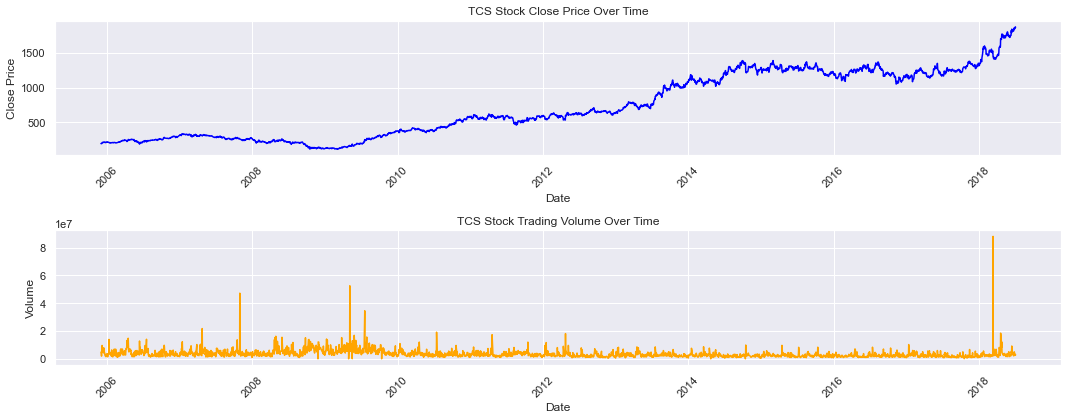

In [188]:
# Visualization of key features over time
plt.figure(figsize=(15, 6))

# Plotting 'Close' price over time
plt.subplot(2, 1, 1)
plt.plot(train_data['Date'], train_data['Close'], label='Close Price', color='blue')
plt.title('TCS Stock Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.xticks(rotation=45)

# Plotting 'Volume' over time
plt.subplot(2, 1, 2)
plt.plot(train_data['Date'], train_data['Volume'], label='Volume', color='orange')
plt.title('TCS Stock Trading Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


<h2> Feature Creation </h2>

Relative Strength Index (RSI): Measures the magnitude of recent price changes to evaluate overbought or oversold conditions.

Moving Average Convergence Divergence (MACD): A trend-following momentum indicator showing the relationship between two moving averages of a security’s price.

Bollinger Bands: A set of lines plotted two standard deviations (positively and negatively) away from a simple moving average (SMA) of the security's price.

On-Balance Volume (OBV): uses volume flow to predict changes in stock price.

In [189]:
# Calculating RSI, MACD, Bollinger Bands, and OBV

# RSI (Relative Strength Index)
def calculate_rsi(data, window=14):
    delta = data.diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

train_data['RSI'] = calculate_rsi(train_data['Close'])

# MACD (Moving Average Convergence Divergence)
def calculate_macd(data, fastperiod=12, slowperiod=26, signalperiod=9):
    fast_ema = data.ewm(span=fastperiod, adjust=False).mean()
    slow_ema = data.ewm(span=slowperiod, adjust=False).mean()
    macd = fast_ema - slow_ema
    signal_line = macd.ewm(span=signalperiod, adjust=False).mean()
    macd_histogram = macd - signal_line
    return macd, signal_line, macd_histogram

train_data['MACD'], train_data['MACDsignal'], train_data['MACDhist'] = calculate_macd(train_data['Close'])

# Bollinger Bands
def calculate_bollinger_bands(data, window=20, num_std=2):
    sma = data.rolling(window=window).mean()
    rstd = data.rolling(window=window).std()
    upper_band = sma + num_std * rstd
    lower_band = sma - num_std * rstd
    return upper_band, sma, lower_band

train_data['BB_upper'], train_data['BB_middle'], train_data['BB_lower'] = calculate_bollinger_bands(train_data['Close'])

# On-Balance Volume (OBV)
def calculate_obv(close_prices, volumes):
    obv = [0]
    for i in range(1, len(close_prices)):
        if close_prices[i] > close_prices[i-1]:
            obv.append(obv[-1] + volumes[i])
        elif close_prices[i] < close_prices[i-1]:
            obv.append(obv[-1] - volumes[i])
        else:
            obv.append(obv[-1])
    return obv

train_data['OBV'] = calculate_obv(train_data['Close'], train_data['Volume'])


<ipython-input-189-ae7183d25ff0>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['RSI'] = calculate_rsi(train_data['Close'])
<ipython-input-189-ae7183d25ff0>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['MACD'], train_data['MACDsignal'], train_data['MACDhist'] = calculate_macd(train_data['Close'])
<ipython-input-189-ae7183d25ff0>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

In [190]:
# Drop NaN values created by lagging and moving averages
train_data = train_data.dropna()

# Displaying the head of the cleaned data with new features
train_data.head()


,Date,Open,High,Low,Close,Adj Close,Volume,RSI,MACD,MACDsignal,MACDhist,BB_upper,BB_middle,BB_lower,OBV
19,2005-12-29,211.250000,214.987503,210.207504,213.757507,153.513870,3461784.0,55.203913,4.070498,4.154129,-0.083632,221.656669,207.228001,192.799333,23667144.0
20,2005-12-30,210.000000,214.987503,210.000000,212.857498,152.867432,2380248.0,61.082580,3.998469,4.122997,-0.124528,221.327641,208.183376,195.039111,21286896.0
21,2006-01-02,213.500000,213.862503,210.169998,210.949997,151.497559,1653504.0,54.247363,3.744304,4.047259,-0.302955,219.705395,209.159876,198.614357,19633392.0
22,2006-01-03,210.657501,217.494995,210.250000,216.649994,155.591125,3396936.0,59.311005,3.957203,4.029247,-0.072045,218.702244,210.279876,201.857508,23030328.0
23,2006-01-04,217.500000,218.737503,215.274994,217.887497,156.479858,3545616.0,61.022135,4.177625,4.058923,0.118702,218.606446,211.202000,203.797555,26575944.0


In [191]:
# Calculating the correlation matrix
correlation_matrix = train_data.corr()

# Displaying the correlation matrix
correlation_matrix


,Open,High,Low,Close,Adj Close,Volume,RSI,MACD,MACDsignal,MACDhist,BB_upper,BB_middle,BB_lower,OBV
Open,1.000000,0.999816,0.999834,0.999646,0.998361,-0.309298,0.047536,0.248223,0.258347,0.030921,0.997886,0.998027,0.996080,0.900880
High,0.999816,1.000000,0.999817,0.999870,0.998580,-0.306112,0.051279,0.250353,0.259357,0.034433,0.997808,0.997820,0.995732,0.900899
Low,0.999834,0.999817,1.000000,0.999859,0.998591,-0.311684,0.050978,0.248490,0.257824,0.033110,0.997733,0.997935,0.996054,0.901129
Close,0.999646,0.999870,0.999859,1.000000,0.998715,-0.308919,0.053565,0.249217,0.257599,0.035839,0.997649,0.997749,0.995758,0.901145
Adj Close,0.998361,0.998580,0.998591,0.998715,1.000000,-0.299942,0.049238,0.247062,0.255679,0.034702,0.996541,0.996587,0.994539,0.882955
Volume,-0.309298,-0.306112,-0.311684,-0.308919,-0.299942,1.000000,0.012599,-0.019583,-0.023424,0.005738,-0.305357,-0.310786,-0.316061,-0.376744
RSI,0.047536,0.051279,0.050978,0.053565,0.049238,0.012599,1.000000,0.618784,0.418967,0.682036,0.008156,0.000506,-0.007849,0.082079
MACD,0.248223,0.250353,0.248490,0.249217,0.247062,-0.019583,0.618784,1.000000,0.939837,0.395929,0.216350,0.202730,0.187428,0.220989
MACDsignal,0.258347,0.259357,0.257824,0.257599,0.255679,-0.023424,0.418967,0.939837,1.000000,0.058404,0.240240,0.228831,0.215889,0.232221
MACDhist,0.030921,0.034433,0.033110,0.035839,0.034702,0.005738,0.682036,0.395929,0.058404,1.000000,-0.013545,-0.022679,-0.032605,0.021565


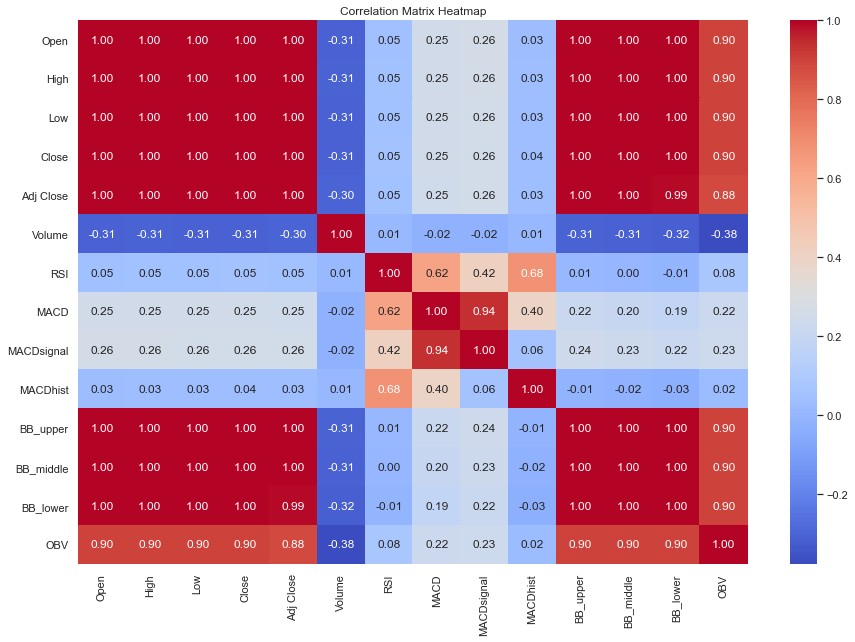

In [192]:
import seaborn as sns

# Plotting the heatmap for the correlation matrix
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()


We can see a lot of highly correlated objects. Let's reduce the features.

In [193]:
# Feature Selection
selected_features = ['Prev_Close', 'Prev_High', 'Prev_Low', 'MA_10', 'RSI', 
                     'MACD', 'MACDsignal', 'MACDhist', 'BB_upper', 'BB_middle', 
                     'BB_lower', 'OBV']


In [194]:
# It appears that we need to create some missing lagged features and additional moving averages

# Creating missing features
train_data['Prev_Close'] = train_data['Close'].shift(1)
train_data['Prev_High'] = train_data['High'].shift(1)
train_data['Prev_Low'] = train_data['Low'].shift(1)
train_data['MA_10'] = train_data['Close'].rolling(window=10).mean()

# Dropping NaN values that were created due to shifting and rolling
train_data = train_data.dropna()

# Re-selecting the features after creating the missing ones
X = train_data[selected_features]

# Target Variable - Next day's closing price
y = train_data['Close'].shift(-1)  # shift upward to align previous features with next day's close

# Dropping the last row which now has NaN as the target variable
X = X[:-1]
y = y[:-1]

In [195]:
X.head()

,Prev_Close,Prev_High,Prev_Low,MA_10,RSI,MACD,MACDsignal,MACDhist,BB_upper,BB_middle,BB_lower,OBV
28,209.062500,212.475006,207.625000,213.124248,47.743312,2.442495,3.466045,-1.023550,218.115248,212.278000,206.440752,28242152.0
29,209.212494,211.125000,201.875000,212.395497,46.043051,1.840130,3.140862,-1.300732,218.427034,212.084000,205.740965,24633584.0
30,206.470001,211.250000,205.500000,211.219247,40.563338,0.918446,2.696379,-1.777933,219.347607,211.423749,203.499892,19828672.0
31,201.095001,206.375000,200.320007,210.416748,35.960034,0.331845,2.223472,-1.891627,219.085482,210.728999,202.372517,23581728.0
32,202.925003,205.000000,201.250000,208.996249,37.169038,-0.169814,1.744815,-1.914629,219.387481,210.266875,201.146269,20416608.0


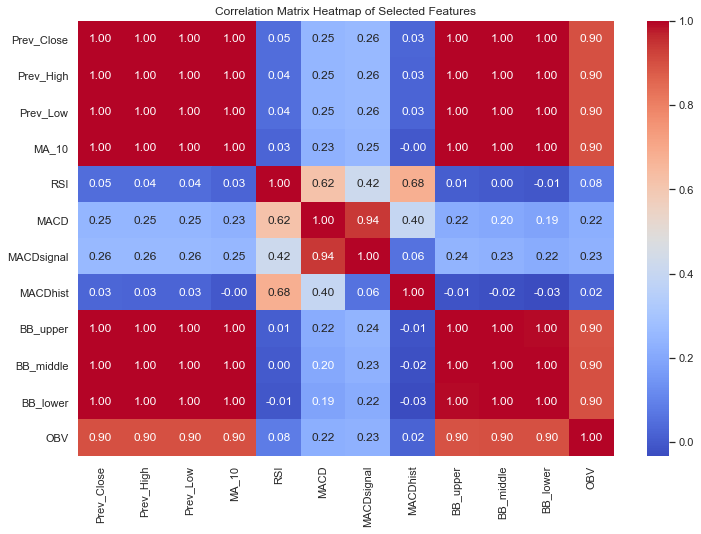

In [196]:
# Calculating the correlation matrix for the selected features
selected_features_correlation_matrix = train_data[selected_features].corr()

# Plotting the heatmap for the correlation matrix of selected features
plt.figure(figsize=(12, 8))
sns.heatmap(selected_features_correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap of Selected Features')
plt.show()


In [197]:
# Feature Selection
selected_features = ['MA_10', 'RSI', 'MACD', 'MACDhist', 'OBV']

In [198]:
X[selected_features]

,MA_10,RSI,MACD,MACDhist,OBV
28,213.124248,47.743312,2.442495,-1.023550,28242152.0
29,212.395497,46.043051,1.840130,-1.300732,24633584.0
30,211.219247,40.563338,0.918446,-1.777933,19828672.0
31,210.416748,35.960034,0.331845,-1.891627,23581728.0
32,208.996249,37.169038,-0.169814,-1.914629,20416608.0
...,...,...,...,...,...
3106,1826.195007,73.911354,30.432013,2.990336,240414752.0
3107,1831.709998,68.398769,30.120434,2.143005,235526627.0
3108,1832.479993,68.694004,29.935919,1.566793,239032903.0
3109,1834.714990,64.996802,29.737384,1.094606,241683193.0


In [199]:
from sklearn.preprocessing import StandardScaler
# Preprocessing - Scaling the Features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X[selected_features])

# Displaying the first few rows of features and target
X_scaled[:5], y[:5]


(array([[-1.1275121 , -0.34515977, -0.09946121, -0.2598969 , -1.2003854 ],
        [-1.12911166, -0.45318889, -0.14666854, -0.32332791, -1.23532941],
        [-1.13169345, -0.80135236, -0.21890081, -0.43253146, -1.28185837],
        [-1.13345489, -1.09383155, -0.26487264, -0.4585494 , -1.24551519],
        [-1.13657279, -1.01701534, -0.30418763, -0.46381324, -1.27616502]]),
 28    206.470001
 29    201.095001
 30    202.925003
 31    202.445007
 32    206.294998
 Name: Close, dtype: float64)

In [200]:
# Preparing the target variable - next day's closing price
y_train = train_data['Close'].shift(-1)[:-1]  # Shift and align with features


In [201]:
y_train.shape

(2943,)

In [202]:
# Checking the size of the final training data and target data
size_X_selected_scaled = X_scaled.shape
size_y_selected = y_train.shape

size_X_selected_scaled, size_y_selected


((2943, 5), (2943,))

In [244]:
# Split the data into training and testing sets
train_data = tcs[:split_point]

train_data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2005-12-02,194.332504,196.800003,192.632507,193.750000,139.145081,4784360.0
1,2005-12-05,194.000000,194.262497,190.782501,191.419998,137.471786,1913080.0
2,2005-12-06,191.875000,196.250000,190.787506,194.250000,139.504196,3233064.0
3,2005-12-07,195.250000,200.000000,195.037506,199.445007,143.235077,5618952.0
4,2005-12-08,199.375000,203.087494,199.032501,202.070007,145.120239,9585192.0
...,...,...,...,...,...,...,...
3107,2018-06-28,1865.000000,1871.000000,1826.300049,1842.699951,1646.496460,4888125.0
3108,2018-06-29,1844.900024,1867.400024,1842.300049,1847.750000,1651.008911,3506276.0
3109,2018-07-02,1852.000000,1857.800049,1841.099976,1851.349976,1654.225586,2650290.0
3110,2018-07-03,1859.949951,1879.900024,1857.050049,1874.050049,1674.508301,3242233.0


In [245]:
from sklearn.base import BaseEstimator, TransformerMixin
import pandas as pd

# RSI Transformer
class RSITransformer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X_transformed = X.copy()
        X_transformed['RSI'] = calculate_rsi(X_transformed['Close'])
        return X_transformed

# MACD Transformer
class MACDTransformer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X_transformed = X.copy()
        macd, signal, hist = calculate_macd(X_transformed['Close'])
        X_transformed['MACD'] = macd
        X_transformed['MACDsignal'] = signal
        X_transformed['MACDhist'] = hist
        return X_transformed

# Bollinger Bands Transformer
class BollingerBandsTransformer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X_transformed = X.copy()
        upper_band, middle_band, lower_band = calculate_bollinger_bands(X_transformed['Close'])
        X_transformed['BB_upper'] = upper_band
        X_transformed['BB_middle'] = middle_band
        X_transformed['BB_lower'] = lower_band
        return X_transformed

# OBV Transformer
class OBVTransformer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X_transformed = X.copy()
        X_transformed['OBV'] = calculate_obv(X_transformed['Close'], X_transformed['Volume'])
        return X_transformed
    
class NaNRemovalTransformer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        return X.dropna()

class FeatureSelector(BaseEstimator, TransformerMixin):
    def __init__(self, selected_features):
        self.selected_features = selected_features

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        return X[self.selected_features]

# Note: Ensure that your calculate_rsi, calculate_macd, calculate_bollinger_bands, and calculate_obv functions
# are defined as in your previous code.


In [249]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# Assuming the custom transformer classes (RSITransformer, MACDTransformer, BollingerBandsTransformer, OBVTransformer)
# and the FeatureSelector class have been defined as previously discussed

# Selected features for the model
selected_features = ['RSI', 'MACD', 'MACDhist', 'OBV', 'Close']


# Creating the pipeline
pipeline = make_pipeline(
    RSITransformer(),
    MACDTransformer(),
    BollingerBandsTransformer(),
    OBVTransformer(),
    NaNRemovalTransformer(),
    FeatureSelector(selected_features)
)

# # Example usage
# # Assuming 'train_data' is your DataFrame with the necessary columns
# # and 'Close' is the target column

# # Prepare the target variable (next day's closing price)
# y = train_data['Close'].shift(-1)[:-1]

# # Apply the pipeline to transform the features
# X_transformed = pipeline.fit_transform(train_data[:-1])  # Exclude the last row to match the target's size

# # X_transformed and y are now ready for model training


In [250]:
train_data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2005-12-02,194.332504,196.800003,192.632507,193.750000,139.145081,4784360.0
1,2005-12-05,194.000000,194.262497,190.782501,191.419998,137.471786,1913080.0
2,2005-12-06,191.875000,196.250000,190.787506,194.250000,139.504196,3233064.0
3,2005-12-07,195.250000,200.000000,195.037506,199.445007,143.235077,5618952.0
4,2005-12-08,199.375000,203.087494,199.032501,202.070007,145.120239,9585192.0
...,...,...,...,...,...,...,...
3107,2018-06-28,1865.000000,1871.000000,1826.300049,1842.699951,1646.496460,4888125.0
3108,2018-06-29,1844.900024,1867.400024,1842.300049,1847.750000,1651.008911,3506276.0
3109,2018-07-02,1852.000000,1857.800049,1841.099976,1851.349976,1654.225586,2650290.0
3110,2018-07-03,1859.949951,1879.900024,1857.050049,1874.050049,1674.508301,3242233.0


In [254]:
X_transformed = pipeline.fit_transform(train_data)
X_transformed.dropna(inplace=True)

In [255]:
X_transformed

,RSI,MACD,MACDhist,OBV,Close
19,55.203913,4.070498,-0.083632,23667144.0,213.757507
20,61.082580,3.998469,-0.124528,21286896.0,212.857498
21,54.247363,3.744304,-0.302955,19633392.0,210.949997
22,59.311005,3.957203,-0.072045,23030328.0,216.649994
23,61.022135,4.177625,0.118702,26575944.0,217.887497
...,...,...,...,...,...
3107,68.398769,30.120434,2.143005,235526627.0,1842.699951
3108,68.694004,29.935919,1.566793,239032903.0,1847.750000
3109,64.996802,29.737384,1.094606,241683193.0,1851.349976
3110,61.662402,31.053781,1.928802,244925426.0,1874.050049


In [258]:
# Shift the 'Close' column to create the target variable for next day prediction
y_train = X_transformed['Close'].shift(-1)

# Remove the last row from X_transformed as its corresponding target is NaN after shifting
X_train = X_transformed.iloc[:-1, :]

# Drop the 'Close' column from X_train as it's now the target variable
X_train = X_train.drop('Close', axis=1)

# Also, drop the first row from y_train to align with X_train
y_train = y_train.iloc[:-1]

# Check the first few rows of X_train and y_train
print(X_train.shape)
print(y_train.shape)


(2952, 4)
(2952,)


In [260]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler to the X_train data and transform it
X_train_scaled = scaler.fit_transform(X_train)

In [261]:
X_train_scaled

array([[ 0.12889352,  0.02814201, -0.04465293, -1.23970464],
       [ 0.50289988,  0.0224885 , -0.05402597, -1.26273313],
       [ 0.06803695,  0.00253924, -0.09491916, -1.27873051],
       ...,
       [ 0.98714576,  2.0583061 ,  0.33360509,  0.84392253],
       [ 0.75192632,  2.04272317,  0.22538541,  0.86956363],
       [ 0.53978866,  2.14604651,  0.4165735 ,  0.90093169]])